<a href="https://colab.research.google.com/github/Boyraci41/Neural-Network/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

test_images.shape

170500096/170498071 [==============================] - 11s 0us/step


(10000, 32, 32, 3)

In [0]:
train_images,test_images = train_images/250.0,test_images/255.0


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [11]:
model.compile(optimizer="adam",loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))


Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4556 - accuracy: 0.4734 - val_loss: 1.1980 - val_accuracy: 0.5727
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1083 - accuracy: 0.6086 - val_loss: 1.1008 - val_accuracy: 0.6121
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9735 - accuracy: 0.6601 - val_loss: 0.9614 - val_accuracy: 0.6659
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8857 - accuracy: 0.6910 - val_loss: 0.9625 - val_accuracy: 0.6667
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8264 - accuracy: 0.7096 - val_loss: 0.9207 - val_accuracy: 0.6840
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7693 - accuracy: 0.7308 - val_loss: 0.9132 - val_accuracy: 0.6837
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7174 - accuracy: 0.7496 - val_loss: 0.8825 -

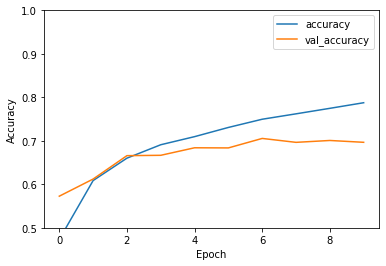

In [15]:
plt.plot(history.history["accuracy"],label ="accuracy")
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5,1])
plt.legend(loc='upper right')